In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


In [5]:
X_train, y_train = split_data(big_train_df, 'wind_speed_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'wind_speed_mean', columns_to_drop)


In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Epoch 1/10
1940/1940 [==============================] - 2s 947us/step - loss: 158.4804
Epoch 2/10
1940/1940 [==============================] - 2s 925us/step - loss: 17.5565
Epoch 3/10
1940/1940 [==============================] - 2s 907us/step - loss: 14.9476
Epoch 4/10
1940/1940 [==============================] - 2s 890us/step - loss: 13.4868
Epoch 5/10
1940/1940 [==============================] - 2s 899us/step - loss: 7.4815
Epoch 6/10
1940/1940 [==============================] - 2s 891us/step - loss: 6.6320
Epoch 7/10
1940/1940 [==============================] - 2s 901us/step - loss: 5.0470
Epoch 8/10
1940/1940 [==============================] - 2s 899us/step - loss: 4.2392
Epoch 9/10
1940/1940 [==============================] - 2s 875us/step - loss: 3.3829
Epoch 10/10
485/485 [==============================] - 0s 684us/step
Training MAE: 1.003810242619025
Training MSE: 1.2766791732732796
Training RMSE: 1.1299022848340823
Training R2: 0.9674013406885664

Test MAE: 1.0076189526012382


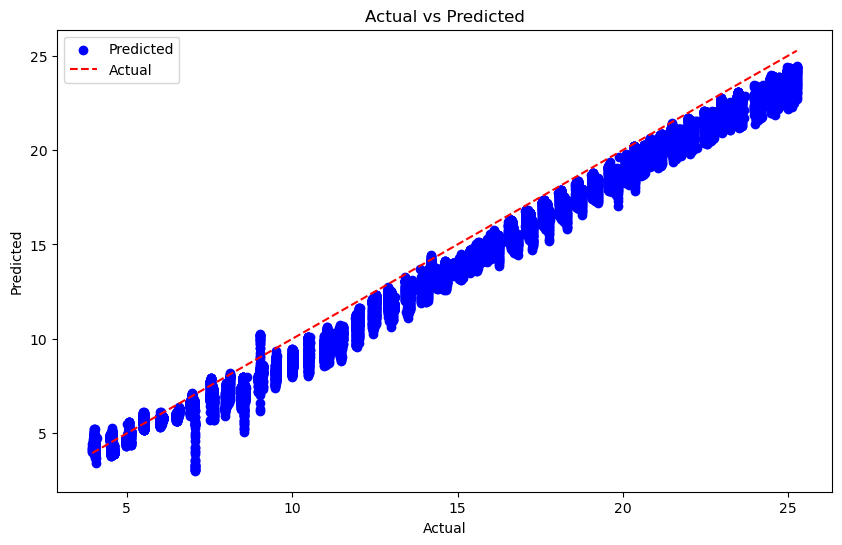

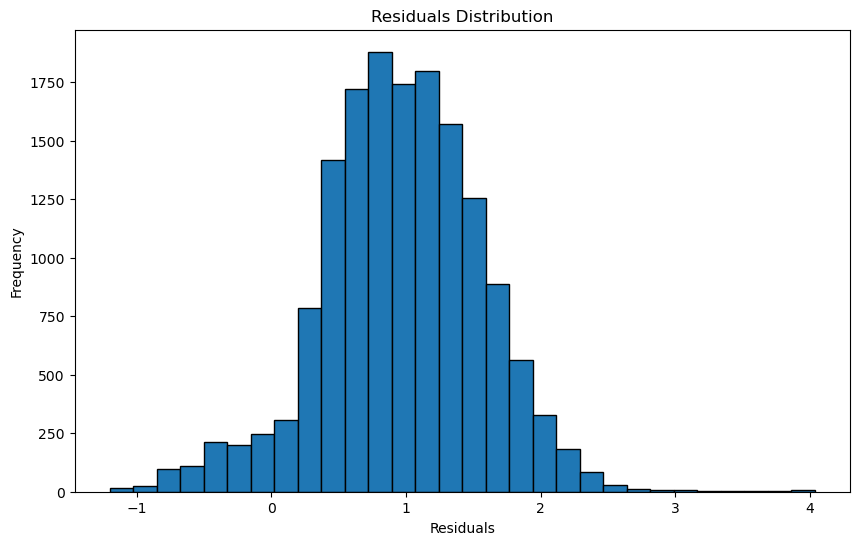

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

# Print evaluation metrics
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, test_predictions.flatten(), color='blue', label='Predicted')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


residuals = (y_test.values.ravel() - test_predictions.flatten())
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

